In [38]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from data_loader import data_loader, compare_race_ethnicity_groups

In [2]:
# read in the data 
num = 10000
df = pd.read_csv('data/hmda_2017_nationwide_all-records_codes.csv').sample(num, random_state=42)

Action Taken:
 1. Loan originated
 2. Application approved but not accepted
 3. Application denied by financial institution
 4. Application withdrawn by applicant
 5. File closed for incompleteness
 6. Loan purchased by the institution
 7. Preapproval request denied by financial institution
 8. Preapproval request approved but not accepted (optional reporting)

 4-8 are not intresting in terms of investigating possible bias

1 and 3 seem like natural opposites, while 2 doesn't entirely fit on a continium between the two. What to do? 

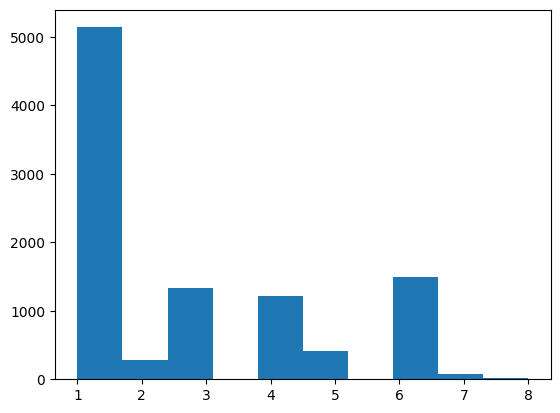

action_taken
1               5142
6               1499
3               1339
4               1218
5                418
2                288
7                 73
8                 23
dtype: int64


In [3]:
# hist of pd series 
plt.hist(df[['action_taken']])
print(df[['action_taken']].value_counts())
plt.show()

### Curated the race feature 
- How does ethnicity variable relate to race? 
    - Ethnicity variable only encodes hispanic or not hispanic ethnicity, and the vast majority of latinos are put down as white 
    - We want to seperate whites and whites of hispanic ethnicity 

(array([ 16.,   0.,   6.,   0.,  18.,   0.,   5.,   0., 773.,  85.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

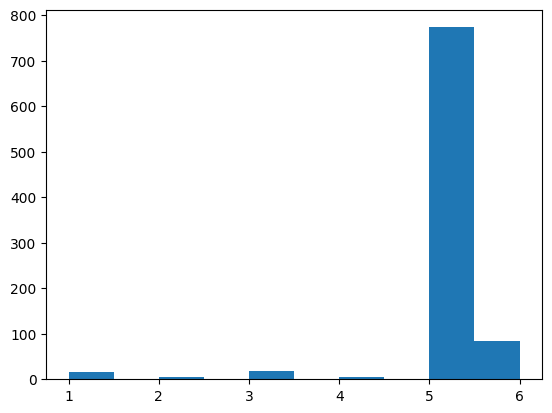

In [4]:
# finding out what race people with latino ethnicity put down
# seems large majority put down white 
# df[df['applicant_ethnicity'] == 1][['applicant_race_1']].value_counts()
plt.hist(df[df['applicant_ethnicity'] == 1][['applicant_race_1']])

In [28]:
# Creating a combined variable of race and ethnicity
# specifically to divide white and latino people 
df['race_Ethnicity'] = df['applicant_race_1'] 
index = df.loc[(df['applicant_race_1'] == 5) & (df['applicant_ethnicity'] == 1)].index 
df.loc[index, 'race_Ethnicity'] = 9 # 9 is a new category for people of latino ethnicity and of white race

People don't seem to encode a second ethnicity (only 49 out 10 0000 people).

Therefore doesn't seem that important to include this information in the race feature for now atleast

In [29]:
# nans in the columns reveal not many people put themselves down as having multiple races
df.isna().sum()[['applicant_race_2','applicant_race_3','applicant_race_4','applicant_race_5']]

applicant_race_2     9951
applicant_race_3     9999
applicant_race_4    10000
applicant_race_5    10000
dtype: int64

### Compare feature distribution in terms of race and/or gender

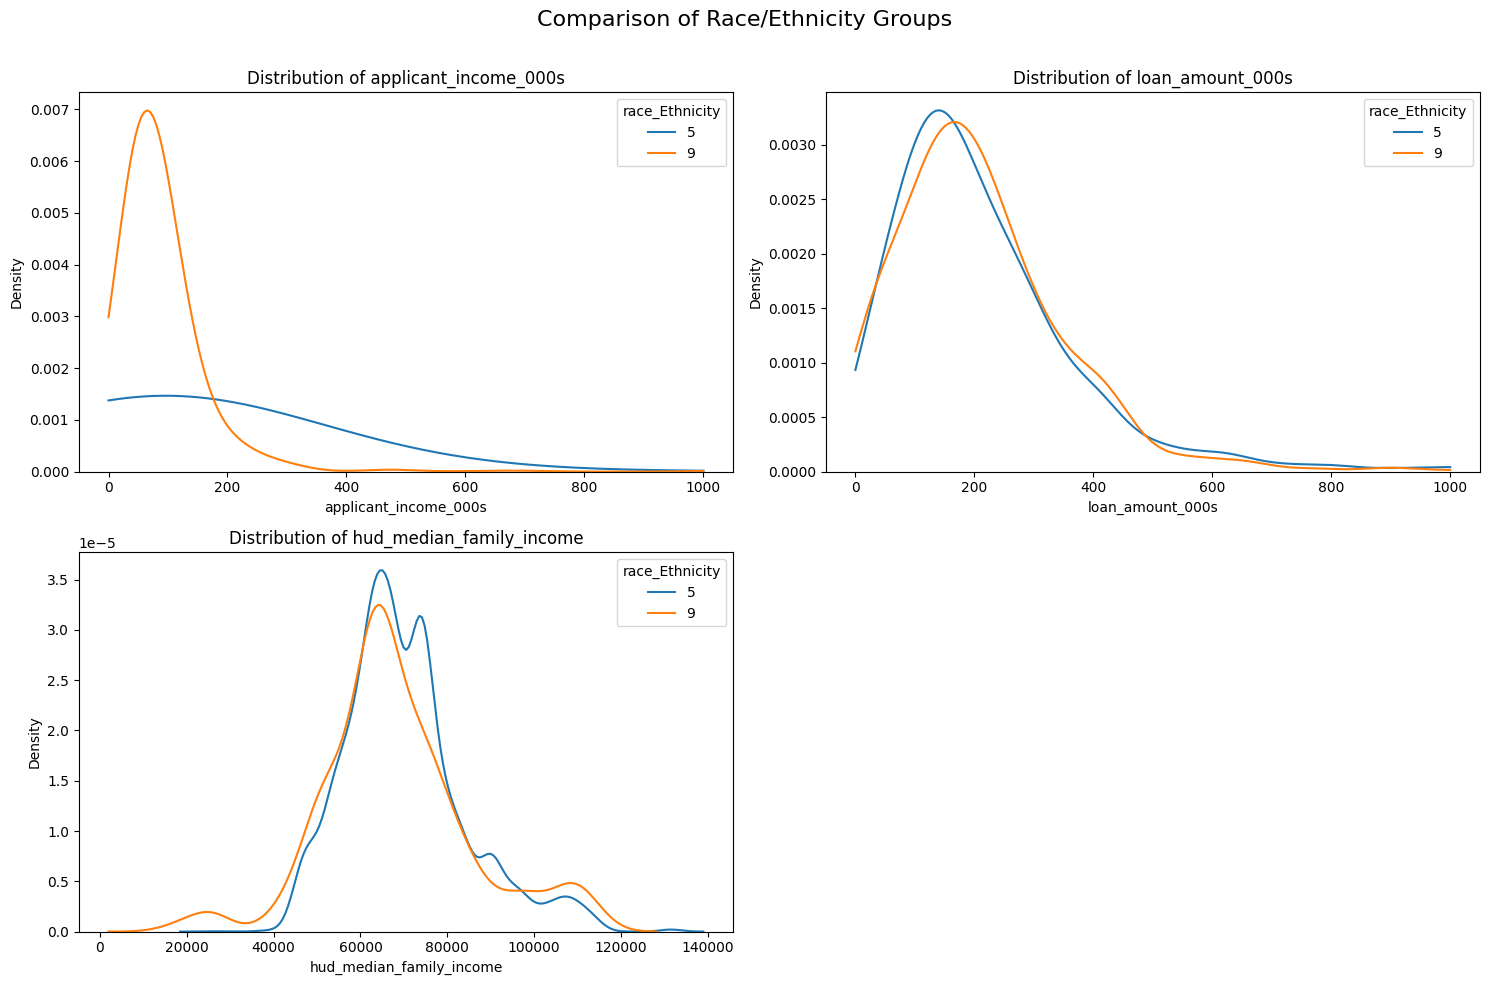

In [31]:
# Replace 'your_dataframe' with the actual DataFrame variable
race_ethnicity_col = 'race_Ethnicity'
groups = [5, 9]
features = ['applicant_income_000s', 'loan_amount_000s', 'hud_median_family_income']

compare_race_ethnicity_groups(df, race_ethnicity_col, groups, features)


### Curate the sexy variable
Sex:
 1. Male
 2. Female
 3. Information not provided by applicant in mail, Internet, or telephone application
 4. Not applicable
 5. No co-applicant

In [33]:
df['applicant_co_applicant_sex'] = df['applicant_sex'].astype(str) + '_' + df['co_applicant_sex'].astype(str)
df['applicant_co_applicant_sex']

12796877    1_5
11787028    2_5
11032322    1_5
9277982     1_2
4094688     1_5
           ... 
11682094    2_1
1321986     2_2
14041227    2_5
13343634    2_1
5863412     1_2
Name: applicant_co_applicant_sex, Length: 10000, dtype: object

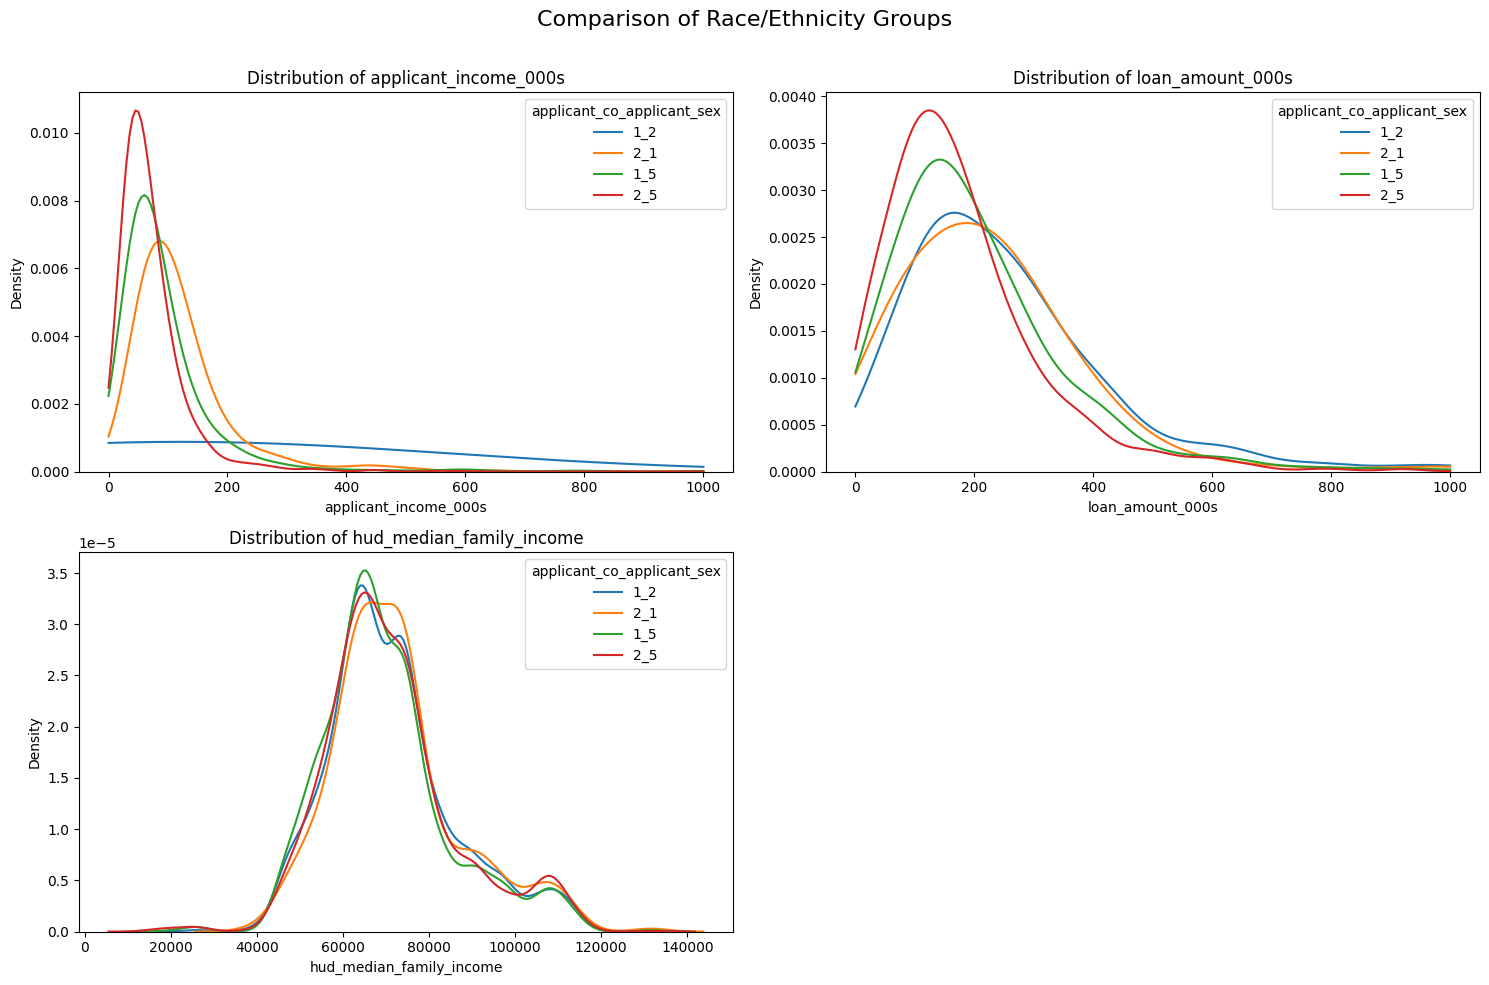

In [36]:
race_ethnicity_col = 'applicant_co_applicant_sex'
groups = ['1_2', '2_1', '1_5', '2_5']
features = ['applicant_income_000s', 'loan_amount_000s', 'hud_median_family_income']

compare_race_ethnicity_groups(df, race_ethnicity_col, groups, features)

In [37]:
df.columns

Index(['as_of_year', 'respondent_id', 'agency_code', 'loan_type',
       'property_type', 'loan_purpose', 'owner_occupancy', 'loan_amount_000s',
       'preapproval', 'action_taken', 'msamd', 'state_code', 'county_code',
       'census_tract_number', 'applicant_ethnicity', 'co_applicant_ethnicity',
       'applicant_race_1', 'applicant_race_2', 'applicant_race_3',
       'applicant_race_4', 'applicant_race_5', 'co_applicant_race_1',
       'co_applicant_race_2', 'co_applicant_race_3', 'co_applicant_race_4',
       'co_applicant_race_5', 'applicant_sex', 'co_applicant_sex',
       'applicant_income_000s', 'purchaser_type', 'denial_reason_1',
       'denial_reason_2', 'denial_reason_3', 'rate_spread', 'hoepa_status',
       'lien_status', 'edit_status', 'sequence_number', 'population',
       'minority_population', 'hud_median_family_income',
       'tract_to_msamd_income', 'number_of_owner_occupied_units',
       'number_of_1_to_4_family_units', 'application_date_indicator',
       'Rac